In [ ]:
import pandas as pd
import numpy as np
import csv 
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
patientdf= pd.read_csv('cancer patient data sets.csv')
patientdf.describe()

In [ ]:
patientdf = patientdf.iloc[:,2:] #removing index and parient id AS THEY ARE NOT USEFULL FOR OUR MODEL

In [ ]:
def unique(i):
    print("{}".format(i))
    print(patientdf[i].nunique())
    print("-"*50)
    
for i in patientdf.select_dtypes(exclude="object"):
    unique(i)

In [ ]:
patientdf.info()

In [ ]:
plt.subplots(figsize = (15,8))
sns.heatmap(patientdf.select_dtypes(include="number").corr(),linewidth = 1, annot = True)
#using the heat map we can see which features have the most effect on cancer allowing us to  use columns that affect lung cancer 

In [ ]:
#understanding how our data is divided between intensity levels with re 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].pie(patientdf['Level'].value_counts(), labels=patientdf['Level'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Level')

axs[1].pie(patientdf['Gender'].value_counts(), labels=patientdf['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

In [ ]:
#here we are checkinf for outliers for each attribute ,
plt.figure(figsize = (16,16))

for i,j in enumerate(patientdf.select_dtypes(include = "number").columns):

    plt.subplot(5,5,i+1)

    sns.boxplot(patientdf[j])
    plt.xlabel("{}".format(j))

    plt.tight_layout()

plt.subplots_adjust()
plt.show()

In [ ]:
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"]) #since internsity levels are strings we need to convert to numeric data

In [ ]:
patientdf.head()

In [ ]:
model = MinMaxScaler()
patientdf.iloc[:,:-1] = model.fit_transform(patientdf.iloc[:,:-1])

In [ ]:
patientdf = patientdf.astype(int)

In [ ]:
col = list(patientdf.columns)
predictor = col[:-1] #selecting predictor columns
target = col[-1] # selecting target columns

display(predictor, target)

In [ ]:
train, test = train_test_split(patientdf, test_size = 0.2, random_state = 0)

display(train, test)

In [ ]:
# Applying Logistic Regression on train data
model = LogisticRegression(random_state = 0, n_jobs = -1).fit(train[predictor], train[target])
model

In [ ]:
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames = ["Actual"], colnames = ["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
patientdf = pd.read_csv('cancer patient data sets.csv')

# Drop the first two columns (index and patient id) as they are not useful
patientdf = patientdf.iloc[:, 2:]

# Define a function to print unique values of each numeric column
def unique(i):
    print("Column: {}".format(i))
    print("Number of unique values: ", patientdf[i].nunique())
    print("-" * 50)

# Display unique values of numeric columns
for i in patientdf.select_dtypes(exclude="object"):
    unique(i)

# Display information about the dataset
patientdf.info()

# Plot a heatmap to visualize the correlation between numeric features
plt.subplots(figsize=(15, 8))
sns.heatmap(patientdf.select_dtypes(include="number").corr(), linewidth=1, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Plot the distribution of 'Level' and 'Gender'
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].pie(patientdf['Level'].value_counts(), labels=patientdf['Level'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Level')
axs[1].pie(patientdf['Gender'].value_counts(), labels=patientdf['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')
plt.tight_layout()
plt.show()

# Check for outliers in numeric attributes
plt.figure(figsize=(16, 16))
for i, j in enumerate(patientdf.select_dtypes(include="number").columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(patientdf[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()
plt.subplots_adjust()
plt.show()

# Encode the 'Level' column to numeric values
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"])

# Scale the numeric attributes using Min-Max scaling
scaler = StandardScaler()
patientdf.iloc[:, :-1] = scaler.fit_transform(patientdf.iloc[:, :-1])

# Convert all columns to integer data type
patientdf = patientdf.astype(int)

# Define predictor and target variables
col = list(patientdf.columns)
predictor = col[:-1]
target = col[-1]

# Split the data into training and testing sets
train, test = train_test_split(patientdf, test_size=0.2, random_state=0)

# Applying Logistic Regression on the train data
model = LogisticRegression(random_state=0, n_jobs=-1).fit(train[predictor], train[target])

# Evaluate the model on the test data
print("For Test:")
test_pred = model.predict(test[predictor])
print("Confusion Matrix:")
print(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

# Evaluate the model on the training data
print("For Train:")
train_pred = model.predict(train[predictor])
print("Confusion Matrix:")
print(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

In [ ]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
# Load the dataset
patientdf = pd.read_csv('cancer patient data sets.csv')

# Drop the first two columns (index and patient id) as they are not useful
patientdf = patientdf.iloc[:, 2:]

# Define a function to print unique values of each numeric column
def unique(i):
    print("Column: {}".format(i))
    print("Number of unique values: ", patientdf[i].nunique())
    print("-" * 50)

# Display unique values of numeric columns
for i in patientdf.select_dtypes(exclude="object"):
    unique(i)

# Display information about the dataset
patientdf.info()

# Plot a heatmap to visualize the correlation between numeric features
plt.subplots(figsize=(15, 8))
sns.heatmap(patientdf.select_dtypes(include="number").corr(), linewidth=1, annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Check for outliers in numeric attributes
plt.figure(figsize=(16, 16))
for i, j in enumerate(patientdf.select_dtypes(include="number").columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(patientdf[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()
plt.subplots_adjust()
plt.show()

# Encode the 'Level' column to numeric values
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"])

# Scale the numeric attributes using Min-Max scaling
scaler = StandardScaler()
patientdf.iloc[:, :-1] = scaler.fit_transform(patientdf.iloc[:, :-1])

# Convert all columns to integer data type
patientdf = patientdf.astype(int)

# Define predictor and target variables
col = list(patientdf.columns)
predictor = col[:-1]
target = col[-1]

# Split the data into training and testing sets
train, test = train_test_split(patientdf, test_size=0.2, random_state=0)

# Applying Logistic Regression on the train data
global model 

model = LogisticRegression(random_state=0, n_jobs=-1).fit(train[predictor], train[target])

model.predict_proba(np.array([[34.0, 1.0, 1.0, 0.0]]))

# Create a separate StandardScaler for user input data
user_data_scaler = StandardScaler()

def predict_cancer_probability(user_data):
    try:
        # Preprocess user data
        user_data = preprocess_user_data(user_data)
        user_data = np.array(user_data).reshape(1, -1)
        # Predict the probability of cancer
        probability = model.predict_proba(user_data)

        return probability
    except Exception as e:
        messagebox.showerror("Error", f"Failed to predict cancer probability: {str(e)}")

# def preprocess_user_data(user_data):
#     # Scale Age using the user_data_scaler
#     user_data["Age"] = user_data_scaler.transform([[user_data["Age"]]])
#     # Encode Gender using the same LabelEncoder used during training
#     user_data["Gender"] = le.transform([user_data["Gender"]])
#     return user_data

# def run_prediction():
#     user_data = get_user_input()
#     if user_data:
#         model = load_model()
#         if model:
#             # Fit the user_data_scaler with the user's input
#             user_data_scaler.fit(train[predictor][["Age"]])  # Fit it only on the "Age" column
#             probability = predict_cancer_probability(model, user_data)
#             if probability is not None:
#                 messagebox.showinfo("Prediction", f"Probability of cancer: {probability[0][1] * 100:.2f}%")

def preprocess_user_data(user_data):
    # Check if le object is None
    if le is None:
        messagebox.showerror("Error", "LabelEncoder object not found")
        return None
    
    # Encode Gender using the same LabelEncoder used during training
    try:
        if user_data["Gender"] == "M":
            user_data["Gender"] = 0
        elif user_data["Gender"] == "F":
            user_data["Gender"] = 1 
    except ValueError as e:
        messagebox.showerror("Input Error", f"Invalid label in 'Gender' column: {str(e)}")
        return None
    
    # Check if user_data_scaler object is None
    if user_data_scaler is None:
        messagebox.showerror("Error", "Scaler object not found")
        return None
    
    user_data["Age"] = user_data_scaler.transform(np.array([[user_data["Age"]]]))
    
    return user_data

def run_prediction():
    user_data = get_user_input()
    if user_data:
        if model:
            # Ensure user data is in the correct format (2D array-like)
            user_data_array = np.array([[user_data["Age"], user_data["Gender"] , user_data["Smoking"], user_data["Alcohol"]]], dtype=float)
            print(user_data_array)
            probability = predict_cancer_probability(np.array([[34.0, 1.0, 1.0, 0.0]]))
            if probability is not None:
                messagebox.showinfo("Prediction", f"Probability of cancer: {probability[0][1] * 100:.2f}%")

                

def get_user_input():
    try:
        user_data = {
            "Age": float(age_entry.get()),
            "Gender": 0 if gender_var.get() == "M" else 1,
            "Smoking": int(smoking_var.get()),
            "Alcohol": int(alcohol_var.get())
        }

        return user_data
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid values for Age and select Gender.")
    return None

# Create the main application window
root = tk.Tk()
root.title("Cancer Probability Prediction")

# Create and place interface elements
age_label = tk.Label(root, text="Age:")
age_label.pack()

age_entry = tk.Entry(root)
age_entry.pack()

gender_label = tk.Label(root, text="Gender:")
gender_label.pack()

gender_var = tk.StringVar()
gender_var.set("M")  # Default value

gender_optionmenu = tk.OptionMenu(root, gender_var, "M", "F")
gender_optionmenu.pack()

smoking_label = tk.Label(root, text="Smoking (0/1):")
smoking_label.pack()

smoking_var = tk.StringVar()
smoking_var.set("0")  # Default value

smoking_optionmenu = tk.OptionMenu(root, smoking_var, "0", "1")
smoking_optionmenu.pack()

alcohol_label = tk.Label(root, text="Alcohol (0/1):")
alcohol_label.pack()

alcohol_var = tk.StringVar()
alcohol_var.set("0")  # Default value

alcohol_optionmenu = tk.OptionMenu(root, alcohol_var, "0", "1")
alcohol_optionmenu.pack()

predict_button = tk.Button(root, text="Predict Probability", command=run_prediction)
predict_button.pack()

# Start the Tkinter main loop
root.mainloop()

In [ ]:
user_data_str = "34, 1, 1, 0"
user_data_list = list(map(float, user_data_str.split(', ')))

user_data_array = np.array([user_data_list], dtype=float)
print(user_data_array)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
patientdf = pd.read_csv('cancer patient data sets.csv')

# Remove unnecessary columns
patientdf = patientdf.iloc[:, 2:]

# Display the unique values in each numeric column
def unique(i):
    print("{}".format(i))
    print(patientdf[i].nunique())
    print("-" * 50)

for i in patientdf.select_dtypes(exclude="object"):
    unique(i)

# Display dataset information
patientdf.info()

# Plot a heatmap to visualize the correlation between numeric features
plt.subplots(figsize=(15, 8))
sns.heatmap(patientdf.select_dtypes(include="number").corr(), linewidth=1, annot=True)

# Remove columns with low correlation to the target
columns_to_remove = [
    'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring'
]

patientdf.drop(columns_to_remove, axis=1, inplace=True)

# Visualize the distribution of the 'Level' and 'Gender' columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].pie(patientdf['Level'].value_counts(), labels=patientdf['Level'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Level')

axs[1].pie(patientdf['Gender'].value_counts(), labels=patientdf['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

# Visualize potential outliers in numeric columns
plt.figure(figsize=(16, 16))
for i, j in enumerate(patientdf.select_dtypes(include="number").columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(patientdf[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

# Encode the 'Level' column to numeric values
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"])

# Scale numeric features to the range [0, 1]
model = MinMaxScaler()
patientdf.iloc[:, :-1] = model.fit_transform(patientdf.iloc[:, :-1])
patientdf = patientdf.astype(int)

# Define predictor and target columns
col = list(patientdf.columns)
predictor = col[:-1]
target = col[-1]

# Split the dataset into training and testing sets
train, test = train_test_split(patientdf, test_size=0.2, random_state=0)

# Train a Logistic Regression model
model = LogisticRegression(random_state=0, n_jobs=-1).fit(train[predictor], train[target])

# Evaluate the Logistic Regression model on test data
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

# Evaluate the Logistic Regression model on train data
print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))


Age
40
--------------------------------------------------
Gender
2
--------------------------------------------------
Air Pollution
8
--------------------------------------------------
Alcohol use
8
--------------------------------------------------
Dust Allergy
8
--------------------------------------------------
OccuPational Hazards
8
--------------------------------------------------
Genetic Risk
7
--------------------------------------------------
chronic Lung Disease
7
--------------------------------------------------
Balanced Diet
7
--------------------------------------------------
Obesity
7
--------------------------------------------------
Smoking
8
--------------------------------------------------
Passive Smoker
8
--------------------------------------------------
Chest Pain
9
--------------------------------------------------
Coughing of Blood
9
--------------------------------------------------
Fatigue
8
--------------------------------------------------
Weight Loss
8
---

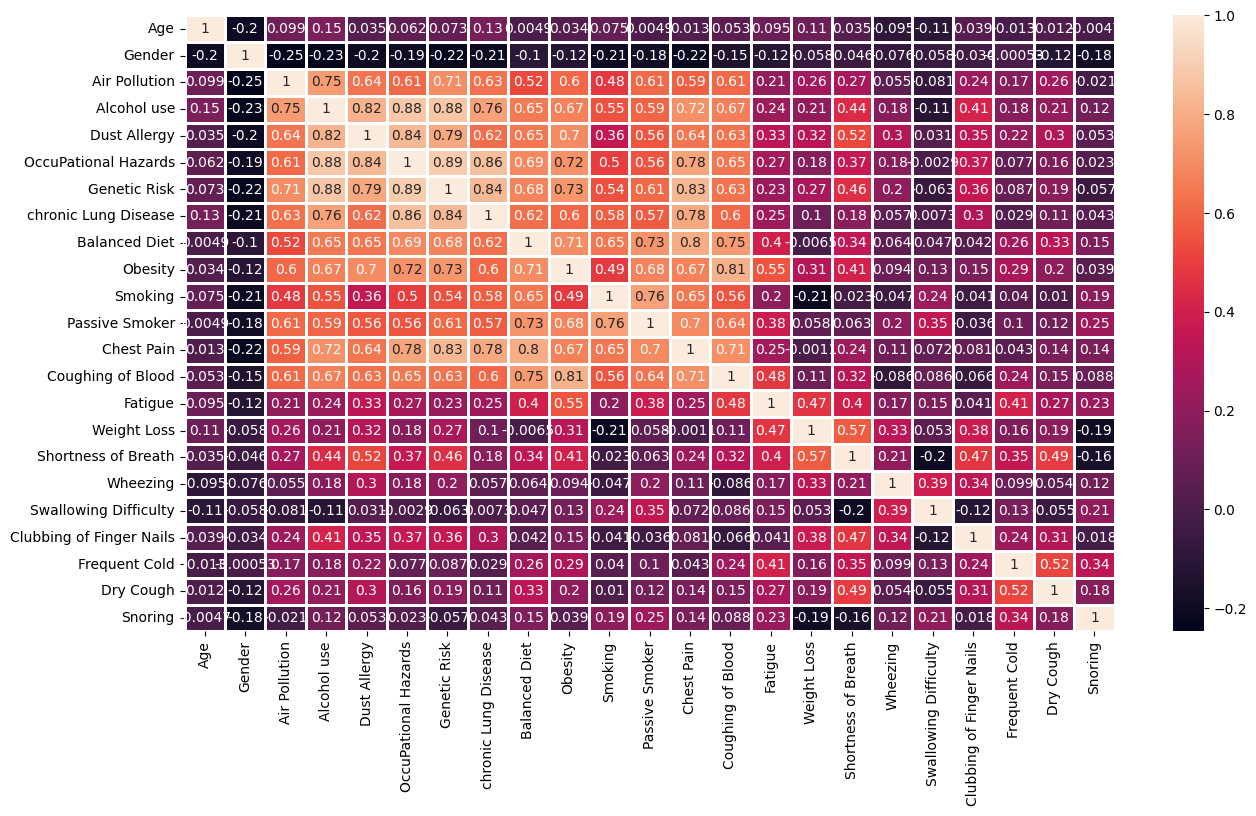

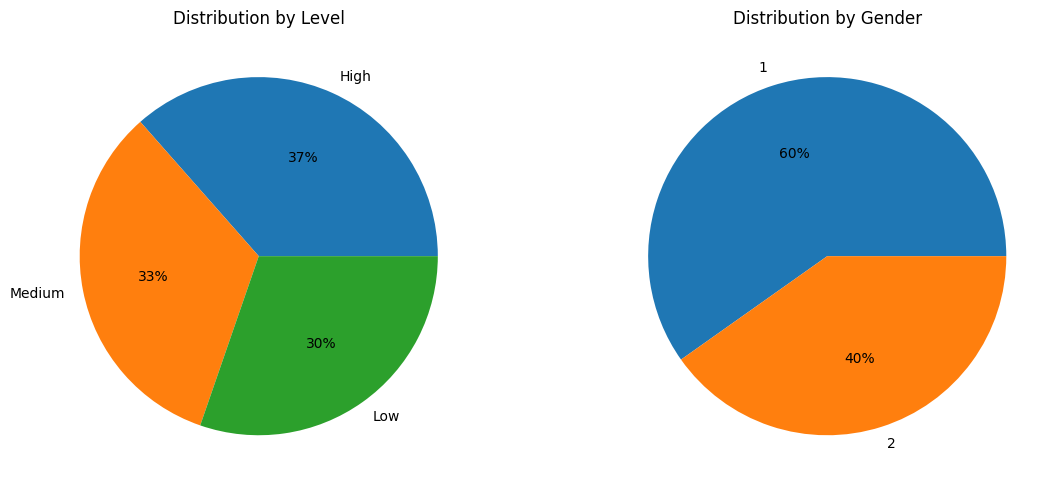

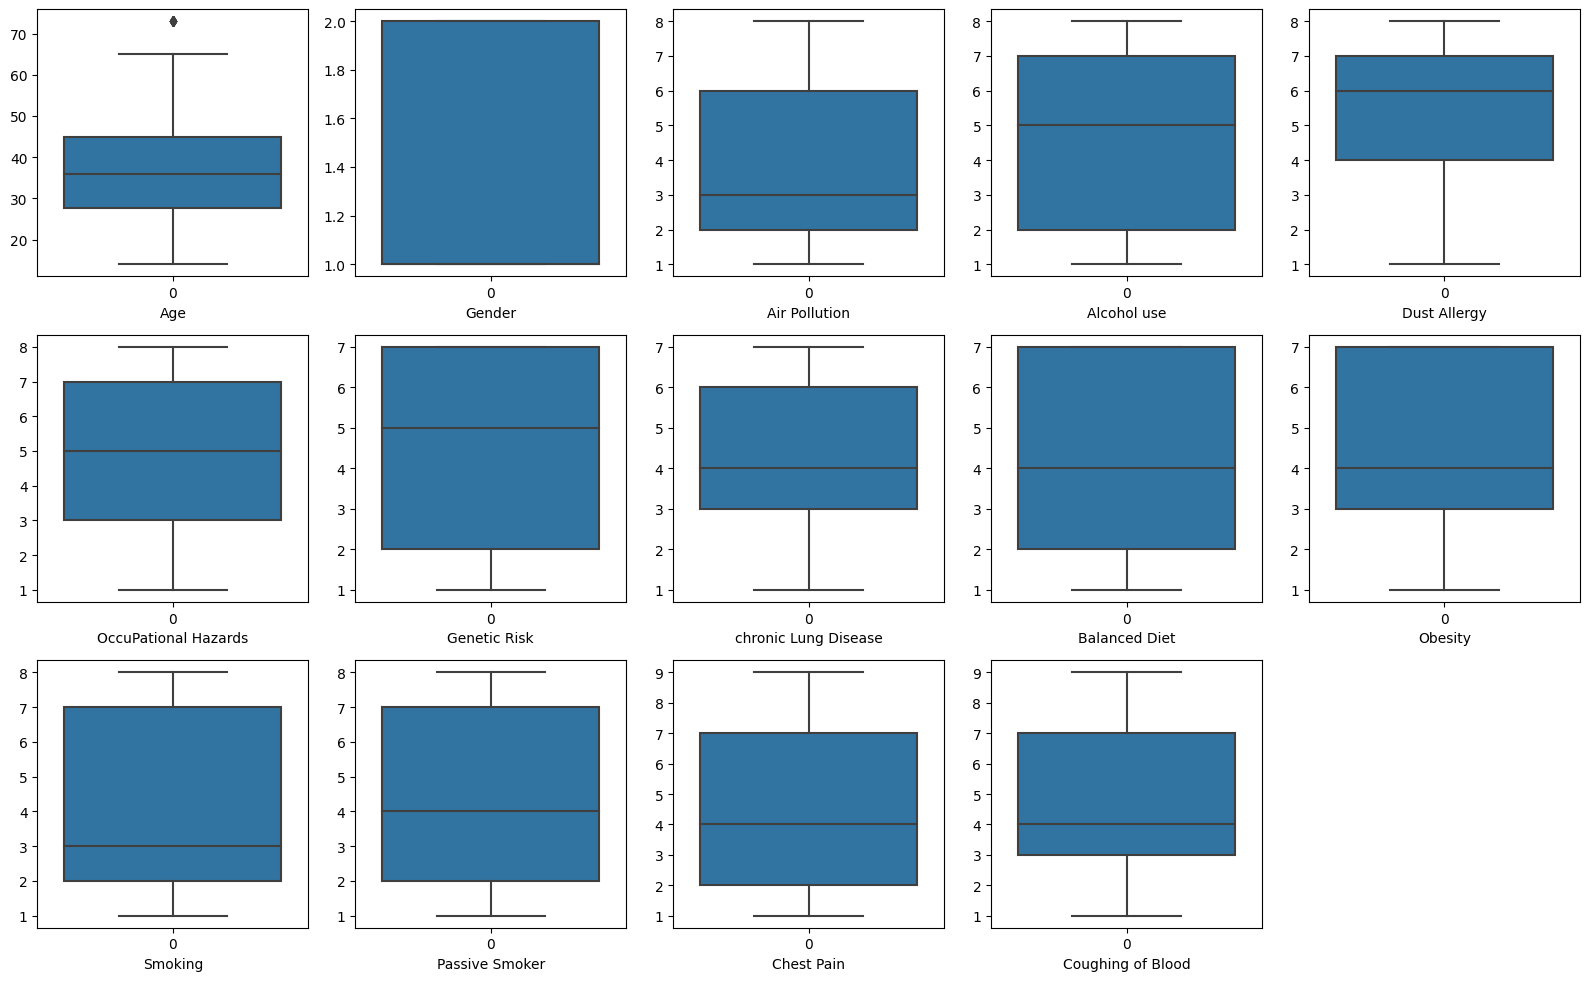

For Test: 


C:\Users\Anirbaan\AppData\Local\Temp\ipykernel_6284\1018848256.py:71: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  patientdf.iloc[:, :-1] = model.fit_transform(patientdf.iloc[:, :-1])


Prediction,0,1,2
Actual,,,
0,40,35,0
1,0,67,0
2,0,46,12


Accuracy:  0.595
..............................................................
For Train: 


Prediction,0,1,2
Actual,,,
0,147,143,0
1,0,236,0
2,0,176,98


Accuracy:  0.60125


c:\Users\Anirbaan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [23]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

patientdf = pd.read_csv('cancer patient data sets.csv')

# Remove unnecessary columns
patientdf = patientdf.iloc[:, 2:]

# Display the unique values in each numeric column
def unique(i):
    print("{}".format(i))
    print(patientdf[i].nunique())
    print("-" * 50)

for i in patientdf.select_dtypes(exclude="object"):
    unique(i)

# Display dataset information
patientdf.info()

# Plot a heatmap to visualize the correlation between numeric features
plt.subplots(figsize=(15, 8))
sns.heatmap(patientdf.select_dtypes(include="number").corr(), linewidth=1, annot=True)

# Remove columns with low correlation to the target
columns_to_remove = [
    'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring'
]

patientdf.drop(columns_to_remove, axis=1, inplace=True)

# Visualize the distribution of the 'Level' and 'Gender' columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].pie(patientdf['Level'].value_counts(), labels=patientdf['Level'].value_counts().index, autopct='%.0f%%')
axs[0].set_title('Distribution by Level')

axs[1].pie(patientdf['Gender'].value_counts(), labels=patientdf['Gender'].value_counts().index, autopct='%.0f%%')
axs[1].set_title('Distribution by Gender')

plt.tight_layout()
plt.show()

# Visualize potential outliers in numeric columns
plt.figure(figsize=(16, 16))
for i, j in enumerate(patientdf.select_dtypes(include="number").columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(patientdf[j])
    plt.xlabel("{}".format(j))
    plt.tight_layout()

plt.subplots_adjust()
plt.show()

# Encode the 'Level' column to numeric values
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"])

# Scale numeric features to the range [0, 1]
model = MinMaxScaler()
patientdf.iloc[:, :-1] = model.fit_transform(patientdf.iloc[:, :-1])
patientdf = patientdf.astype(int)

# Define predictor and target columns
col = list(patientdf.columns)
predictor = col[:-1]
target = col[-1]

# Split the dataset into training and testing sets
train, test = train_test_split(patientdf, test_size=0.2, random_state=0)

# Train a Logistic Regression model
model = LogisticRegression(random_state=0, n_jobs=-1).fit(train[predictor], train[target])

# Evaluate the Logistic Regression model on test data
print("For Test: ")
test_pred = model.predict(test[predictor])
display(pd.crosstab(test[target], test_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

# Evaluate the Logistic Regression model on train data
print("For Train: ")
train_pred = model.predict(train[predictor])
display(pd.crosstab(train[target], train_pred, rownames=["Actual"], colnames=["Prediction"]))
print("Accuracy: ", accuracy_score(train[target], train_pred))

# Function to predict cancer
def predict_cancer():
    input_data = [
        int(age_entry.get()),
        0 if gender_var.get() == "Male" else 1,
        int(air_pollution_scale.get()),
        int(alcohol_use_scale.get()),
        int(dust_allergy_scale.get()),
        int(occupational_hazards_scale.get()),
        int(genetic_risk_scale.get()),
        int(chronic_lung_disease_scale.get()),
        int(balanced_diet_scale.get()),
        int(obesity_scale.get()),
        int(smoking_scale.get()),
        int(passive_smoker_scale.get()),
        int(chest_pain_scale.get()),
        int(coughing_of_blood_scale.get())
    ]

    # Get probability scores for each class
    prediction = model.predict(np.array([input_data]).reshape(1, -1))

    if prediction == 0:
        messagebox.showinfo("Prediction Result", "You are likely to be cancer-free.")
    else:
        messagebox.showinfo("Prediction Result", "You may have lung cancer. Please consult a medical professional.")


# Create the main window
root = tk.Tk()
root.title('Lung Cancer Prediction')

# Create and arrange widgets
age_label = tk.Label(root, text='Age:')
age_label.grid(row=0, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=0, column=1)

gender_label = tk.Label(root, text='Gender:')
gender_label.grid(row=1, column=0)
gender_var = tk.StringVar(value='Male')
gender_option = ttk.Combobox(root, textvariable=gender_var, values=['Male', 'Female'])
gender_option.grid(row=1, column=1)

air_pollution_label = tk.Label(root, text='Air Pollution:')
air_pollution_label.grid(row=2, column=0)
air_pollution_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
air_pollution_scale.grid(row=2, column=1)

# Alcohol Use
alcohol_use_label = tk.Label(root, text='Alcohol Use:')
alcohol_use_label.grid(row=3, column=0)
alcohol_use_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
alcohol_use_scale.grid(row=3, column=1)

# Dust Allergy
dust_allergy_label = tk.Label(root, text='Dust Allergy:')
dust_allergy_label.grid(row=4, column=0)
dust_allergy_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
dust_allergy_scale.grid(row=4, column=1)

# Occupational Hazards
occupational_hazards_label = tk.Label(root, text='Occupational Hazards:')
occupational_hazards_label.grid(row=5, column=0)
occupational_hazards_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
occupational_hazards_scale.grid(row=5, column=1)

# Genetic Risk
genetic_risk_label = tk.Label(root, text='Genetic Risk:')
genetic_risk_label.grid(row=6, column=0)
genetic_risk_scale = tk.Scale(root, from_=0, to=7, orient='horizontal')
genetic_risk_scale.grid(row=6, column=1)

# Chronic Lung Disease
chronic_lung_disease_label = tk.Label(root, text='Chronic Lung Disease:')
chronic_lung_disease_label.grid(row=7, column=0)
chronic_lung_disease_scale = tk.Scale(root, from_=0, to=7, orient='horizontal')
chronic_lung_disease_scale.grid(row=7, column=1)

# Balanced Diet
balanced_diet_label = tk.Label(root, text='Balanced Diet:')
balanced_diet_label.grid(row=8, column=0)
balanced_diet_scale = tk.Scale(root, from_=0, to=7, orient='horizontal')
balanced_diet_scale.grid(row=8, column=1)

# Obesity
obesity_label = tk.Label(root, text='Obesity:')
obesity_label.grid(row=9, column=0)
obesity_scale = tk.Scale(root, from_=0, to=7, orient='horizontal')
obesity_scale.grid(row=9, column=1)

# Smoking
smoking_label = tk.Label(root, text='Smoking:')
smoking_label.grid(row=10, column=0)
smoking_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
smoking_scale.grid(row=10, column=1)

# Passive Smoker
passive_smoker_label = tk.Label(root, text='Passive Smoker:')
passive_smoker_label.grid(row=11, column=0)
passive_smoker_scale = tk.Scale(root, from_=0, to=8, orient='horizontal')
passive_smoker_scale.grid(row=11, column=1)

# Chest Pain
chest_pain_label = tk.Label(root, text='Chest Pain:')
chest_pain_label.grid(row=12, column=0)
chest_pain_scale = tk.Scale(root, from_=0, to=9, orient='horizontal')
chest_pain_scale.grid(row=12, column=1)

# Coughing of Blood
coughing_of_blood_label = tk.Label(root, text='Coughing of Blood:')
coughing_of_blood_label.grid(row=13, column=0)
coughing_of_blood_scale = tk.Scale(root, from_=0, to=9, orient='horizontal')
coughing_of_blood_scale.grid(row=13, column=1)

predict_button = tk.Button(root, text='Predict', command=predict_cancer)
predict_button.grid(row=15, column=0, columnspan=2)

root.mainloop()

In [16]:
from sklearn.metrics import f1_score

# Check class distribution
print("Class distribution in the test set:")
print(test[target].value_counts())

# Evaluate the model using F1-score
f1_test = f1_score(test[target], test_pred, average="macro")
print("F1-score on test data:", f1_test)

Class distribution in the test set:
0    75
1    67
2    58
Name: Level, dtype: int64
F1-score on test data: 0.5539217102412249


In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
patientdf = pd.read_csv('cancer patient data sets.csv')

# Remove unnecessary columns
patientdf = patientdf.iloc[:, 2:]

# Remove columns with low correlation to the target
columns_to_remove = [
    'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
    'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring'
]

patientdf.drop(columns=columns_to_remove, axis=1, inplace=True)

# Encode the 'Level' column to numeric values
le = LabelEncoder()
patientdf["Level"] = le.fit_transform(patientdf["Level"])

# Scale numeric features to the range [0, 1]
scaler = MinMaxScaler()
patientdf.iloc[:, :-1] = scaler.fit_transform(patientdf.iloc[:, :-1])
patientdf = patientdf.astype(int)

# Define predictor and target columns
col = list(patientdf.columns)
predictor = col[:-1]
target = col[-1]

# Split the dataset into training and testing sets
train, test = train_test_split(patientdf, test_size=0.2, random_state=0)

# Train a Logistic Regression model
model = LogisticRegression(random_state=0, n_jobs=-1)
model.fit(train[predictor], train[target])

# Evaluate the Logistic Regression model on test data
print("For Test: ")
test_pred = model.predict(test[predictor])
print("Accuracy: ", accuracy_score(test[target], test_pred))

print("..............................................................")

# Function to make a prediction
def predict_cancer(age, gender, symptoms):
    # Create a DataFrame with user input
    data = pd.DataFrame({
        'Age': age,
        'Gender': gender,
        'Air Pollution': [symptoms[0]],
        'Alcohol use': [symptoms[1]],
        'Dust Allergy': [symptoms[2]],
        'OccuPational Hazards': [symptoms[3]],
        'Genetic Risk': [symptoms[4]],
        'chronic Lung Disease': [symptoms[5]],
        'Balanced Diet': [symptoms[6]],
        'Obesity': [symptoms[7]],
        'Smoking': [symptoms[8]],
        'Passive Smoker': [symptoms[9]],
        'Chest Pain': [symptoms[10]],
        'Coughing of Blood': [symptoms[11]],
    })

    # Scale numeric features to the range [0, 1]
    data.iloc[:, 2:] = scaler.transform(data.iloc[:, 2:])

    # Make a prediction
    prediction = model.predict(data)

    return "Cancer" if prediction[0] == 1 else "No Cancer"

# Get user input for prediction
age = float(input("Enter Age: "))
gender = int(input("Enter Gender (Male 0/Female 1): "))
symptoms = []
for symptom in patientdf.columns[2:]:
    symptom_value = input(f"Does the patient have {symptom}? (Y/N): ").strip().lower()
    symptoms.append(1 if symptom_value == 'y' else 0)

# Make a prediction
result = predict_cancer(age, gender, symptoms)
print(f"The prediction is: {result}")

C:\Users\Anirbaan\AppData\Local\Temp\ipykernel_6284\1407489793.py:28: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  patientdf.iloc[:, :-1] = scaler.fit_transform(patientdf.iloc[:, :-1])


For Test: 
Accuracy:  0.595
..............................................................


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Age
- Gender
